In [1]:
# Libraries and Magic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.optimize import curve_fit
import re

def mymatch(string):
    return re.sub(r'(.*) (CITY|TOWN)$',r"\1", string)


%matplotlib inline

# Read csv

dfA = pd.read_csv('csvData/mudf15q3pub_csv.csv', encoding = "ISO-8859-1")
#print(dfA.head())

dfC = pd.read_csv('csvData/PEP_2016_PEPANNRES_with_ann.csv', encoding = "ISO-8859-1")

dfCONVERSION = pd.read_csv('csvData/conversion.csv', encoding = "ISO-8859-1")
dConv = dfCONVERSION.set_index('STATE').to_dict()['CODE']

dfC = dfC[['GEO.display-label','respop72015']][1:]
dfC.columns = ['CITYTOT','POPULATION']

dfC1 = dfC.copy()
dfC1['CITYTOT'] = dfC1['CITYTOT'].apply(lambda x: x.upper())
dfC1['STATE'] = dfC1['CITYTOT'].apply(lambda x : x.split(', ')[1])
dfC1['CITY'] = dfC1['CITYTOT'].apply(lambda x : x.split(', ')[0]).apply(lambda x : mymatch(x))
dfC1['POPULATION'] = dfC1['POPULATION'].apply(lambda x : int(x))

dfC2 = dfC1[(dfC1['POPULATION']>10000) & (dfC1['POPULATION']<100001)].copy()

dfC2['STATECOD'] = dfC2['STATE'].apply(lambda x : dConv[x])

/Users/amezzali/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dfA1 = dfA[['ADSTATE','ADCITY','DISCIPL','INCOME','MID','COMMONNAME','LOCALE4']].copy()
dfA1.columns = ['STATECOD', 'CITY', 'DISCIPL', 'INCOME','MUSEUMCOD','MUSEUMNAME','ZONE']
dfA1.describe()

,INCOME,MUSEUMCOD,ZONE
count,2.296100e+04,3.307200e+04,32995.000000
mean,1.069682e+08,8.403812e+09,2.505834
std,2.509287e+09,2.662542e+06,1.211841
min,-9.230000e+02,8.400100e+09,1.000000
25%,0.000000e+00,8.401801e+09,1.000000
50%,8.781000e+03,8.403600e+09,2.000000
75%,2.163770e+05,8.404801e+09,4.000000
max,8.318144e+10,8.409504e+09,4.000000


In [4]:
# Discipline chart  DISCIPL

#ART Art Museums
#BOT Arboretums, Botanical Gardens, & Nature Centers
#CMU Children's Museums
#GMU Uncategorized or General Museums
#HSC Historical Societies, Historic Preservation
#HST History Museums
#NAT Natural History & Natural Science Museums
#SCI Science & Technology Museums & Planetariums
#ZAW Zoos, Aquariums, & Wildlife Conservation

In [ ]:
dfAC = pd.merge(dfA1, dfC2, how='left', on=['STATECOD', 'CITY']).dropna()
dfAC.head()

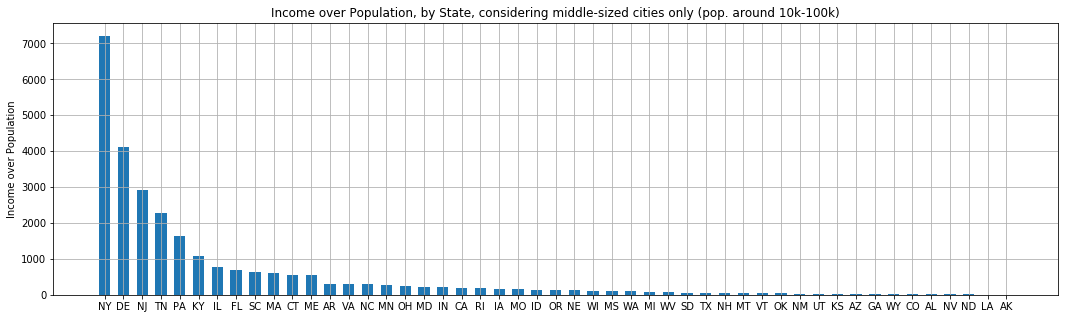

In [10]:
# First Plot

dfAC3 = dfAC.groupby(['STATECOD']).agg({'INCOME':'sum','POPULATION':'sum'}).reset_index()
dfAC3['RATIO'] = dfAC3['INCOME']/dfAC3['POPULATION']

dfAC3 = dfAC3.sort_values('RATIO',ascending=False)

x = range(len(dfAC3['STATECOD'].unique()))

y = np.array(dfAC3['RATIO'])

plt.figure(figsize=(18, 5))
plt.bar(x,y,width=.6)

plt.grid()
plt.xticks(x, dfAC3['STATECOD'] )
plt.ylabel('Income over Population')
plt.title('Income over Population, by State, considering middle-sized cities only (pop. around 10k-100k)')

plt.savefig('plot1.png')

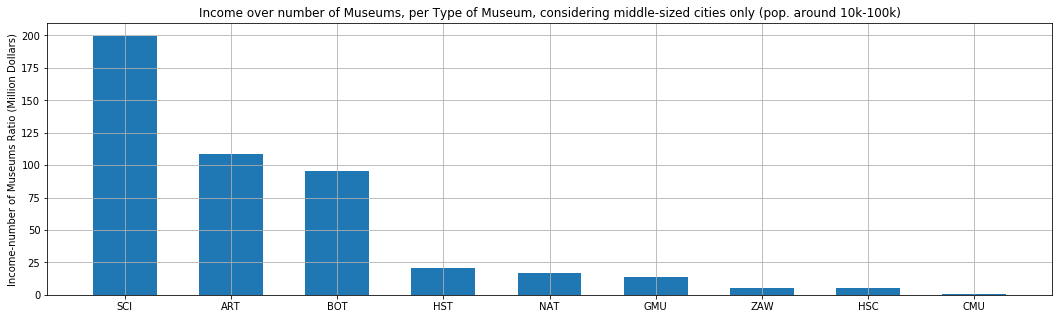

In [9]:
# Second Plot

dfAC4 = dfAC.groupby(['DISCIPL']).agg({'INCOME':'sum','MUSEUMNAME':'count'}).reset_index()

dfAC4['RATIO'] = dfAC4['INCOME']/dfAC4['MUSEUMNAME']

dfAC4 = dfAC4.sort_values('RATIO',ascending=False)

x = range(len(dfAC4['DISCIPL'].unique()))

y = np.array(dfAC4['RATIO']/1000000)

plt.figure(figsize=(18, 5))
plt.bar(x,y,width=.6)

plt.grid()
plt.xticks(x, dfAC4['DISCIPL'] )
plt.ylabel('Income-number of Museums Ratio (Million Dollars)')
plt.title('Income over number of Museums, per Type of Museum, considering middle-sized cities only (pop. around 10k-100k)')

plt.savefig('plot2.png')